****
# Sentiment Analysis  For Nike Shoes
****

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. Valence Aware Dictionary and sEntiment Reasoner (VADER) - Bag of words approach
2. Textblob
3. SentiWord Net

In [1]:
#!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from textblob import TextBlob
plt.style.use('ggplot')
from rid_utils import show_category, show_distribution

import warnings
warnings.filterwarnings("ignore")

In [3]:
path="C:/Users/DELL/Project/FreeWorks/Sentiment Analysis for Adidas and Twitter/Sentiment Analysis App/nike_data_13-09-2023.csv"

df = pd.read_csv(path, index_col=[0])

In [4]:
df.head()

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,subtitle,colorDescription,fullPrice,discounted,employeePrice,currentPrice,isLaunch,pid,label
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Palomino/White/Wild Berry,110,True,49.78,82.97,False,1003842468,IN_STOCK
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Sky J Purple/White/Sky J Light Purple,110,False,66.00,110.00,False,1012365345,IN_STOCK
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Black/University Blue/White/Black,110,False,66.00,110.00,False,1012365344,IN_STOCK
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4586
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4550 non-null   float64
 1   Review Date         4550 non-null   object 
 2   Location            3011 non-null   object 
 3   Username            4550 non-null   object 
 4   Review              4587 non-null   object 
 5   Fit Feedback        407 non-null    object 
 6   Comfort Feedback    407 non-null    object 
 7   Recommend Feedback  407 non-null    object 
 8   title               4587 non-null   object 
 9   IsPromoReview       4587 non-null   bool   
 10  subtitle            4587 non-null   object 
 11  colorDescription    4587 non-null   object 
 12  fullPrice           4587 non-null   int64  
 13  discounted          4587 non-null   bool   
 14  employeePrice       4587 non-null   float64
 15  currentPrice        4587 non-null   float64
 16  isLaun

In [6]:
df.columns

Index(['Rating', 'Review Date', 'Location', 'Username', 'Review',
       'Fit Feedback', 'Comfort Feedback', 'Recommend Feedback', 'title',
       'IsPromoReview', 'subtitle', 'colorDescription', 'fullPrice',
       'discounted', 'employeePrice', 'currentPrice', 'isLaunch', 'pid',
       'label'],
      dtype='object')

In [7]:
df.iloc[1009:]["Review"]

1009    Perfect shoes Perfect shoe. I bought these for...
1010                    The best shoes. Highly recommend!
1011                    The best shoes. Highly recommend!
1012                    The best shoes. Highly recommend!
1013                    The best shoes. Highly recommend!
                              ...                        
4582    Best air force 1s I bought these for my cousin...
4583    Timeles classic A timeless classic. Nothing li...
4584                                                 None
4585                                                 None
4586                                                 None
Name: Review, Length: 3578, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4586
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4550 non-null   float64
 1   Review Date         4550 non-null   object 
 2   Location            3011 non-null   object 
 3   Username            4550 non-null   object 
 4   Review              4587 non-null   object 
 5   Fit Feedback        407 non-null    object 
 6   Comfort Feedback    407 non-null    object 
 7   Recommend Feedback  407 non-null    object 
 8   title               4587 non-null   object 
 9   IsPromoReview       4587 non-null   bool   
 10  subtitle            4587 non-null   object 
 11  colorDescription    4587 non-null   object 
 12  fullPrice           4587 non-null   int64  
 13  discounted          4587 non-null   bool   
 14  employeePrice       4587 non-null   float64
 15  currentPrice        4587 non-null   float64
 16  isLaun

In [9]:
df["ID"] = range(1, len(df)+1)
df

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,subtitle,colorDescription,fullPrice,discounted,employeePrice,currentPrice,isLaunch,pid,label,ID
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK,1
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Palomino/White/Wild Berry,110,True,49.78,82.97,False,1003842468,IN_STOCK,2
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Sky J Purple/White/Sky J Light Purple,110,False,66.00,110.00,False,1012365345,IN_STOCK,3
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Black/University Blue/White/Black,110,False,66.00,110.00,False,1012365344,IN_STOCK,4
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,5.0,"Aug 17, 2023",US,Katrina,Best air force 1s I bought these for my cousin...,True to Size,Very Comfortable,Yes,Nike Air VaporMax Plus,False,Men's Shoes,Work Blue/Diffused Blue/White/Cool Grey,210,True,101.38,168.97,False,12238830,IN_STOCK,4583
4583,5.0,"Aug 17, 2023",US,RakemaW24524484,Timeles classic A timeless classic. Nothing li...,True to Size,Very Comfortable,Yes,Nike Air VaporMax Plus,False,Men's Shoes,Work Blue/Diffused Blue/White/Cool Grey,210,True,101.38,168.97,False,12238830,IN_STOCK,4584
4584,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,Nike Air VaporMax Plus,False,Men's Shoes,Work Blue/Diffused Blue/White/Cool Grey,210,True,101.38,168.97,False,12238830,IN_STOCK,4585
4585,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,Nike Air VaporMax Plus,False,Men's Shoes,Work Blue/Diffused Blue/White/Cool Grey,210,True,101.38,168.97,False,12238830,IN_STOCK,4586


In [10]:
df.to_csv("nike_web_review.to_csv")

****
# Exploratory Data Analysis
*****

The statistical values are as follows:
 Minimum value:1.00
 Maximum value: 5.00
 Mode: 5.00 
 Mean: 4.84 
 Standard Deviation: 0.50 
 Variance: 0.71 
 Median: 5.00


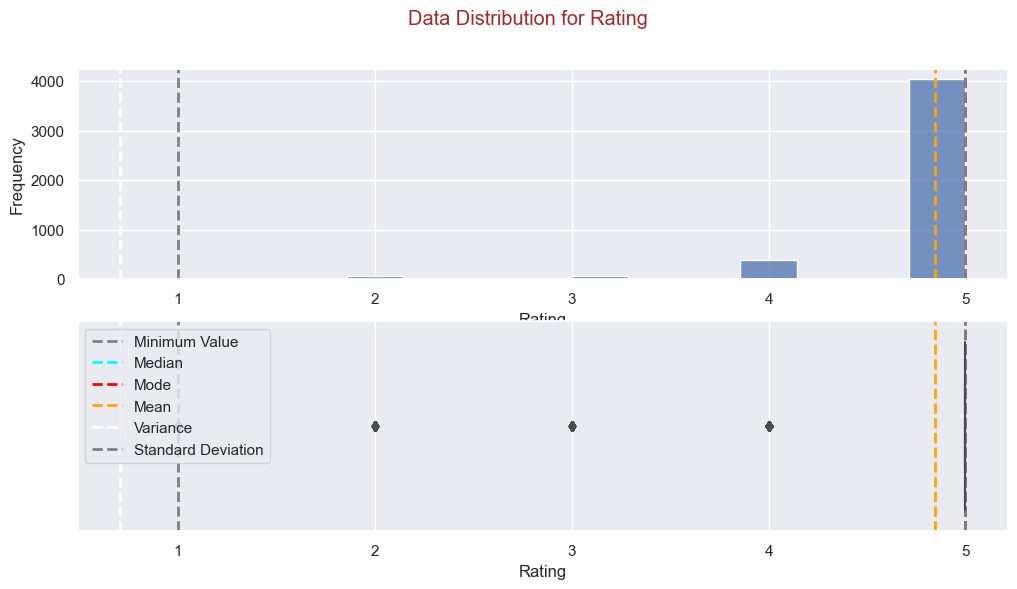

The statistical values are as follows:
 Minimum value:28.00
 Maximum value: 210.00
 Mode: 125.00 
 Mean: 116.77 
 Standard Deviation: 26.99 
 Variance: 5.20 
 Median: 125.00


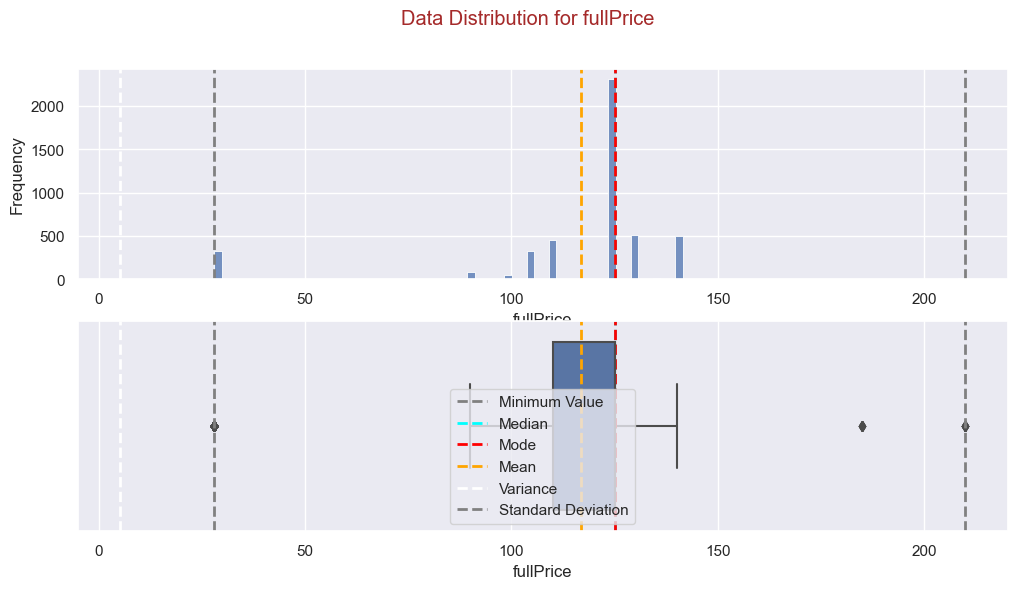

The statistical values are as follows:
 Minimum value:16.80
 Maximum value: 101.38
 Mode: 75.00 
 Mean: 66.33 
 Standard Deviation: 16.46 
 Variance: 4.06 
 Median: 75.00


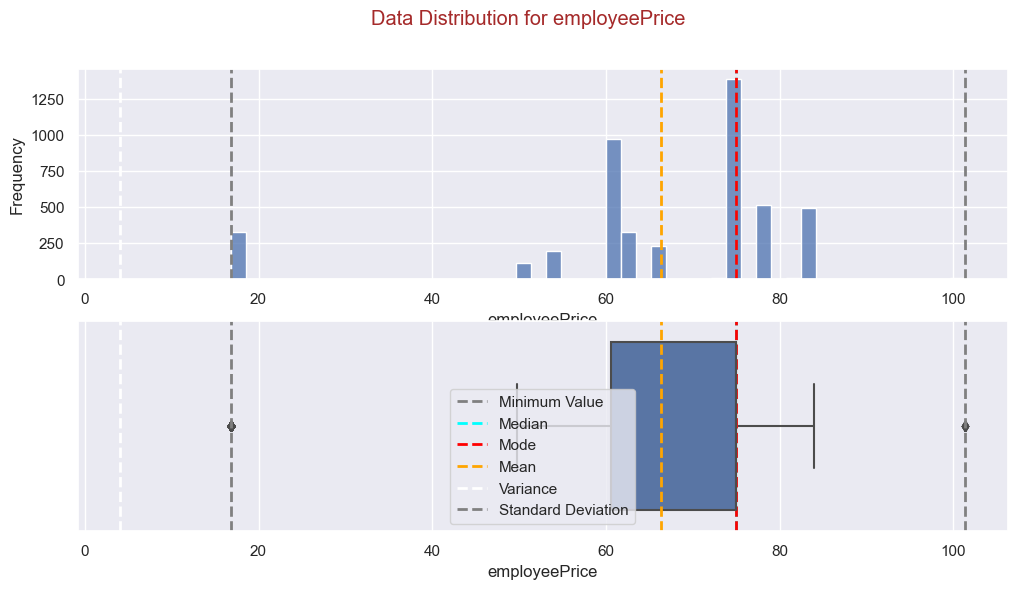

The statistical values are as follows:
 Minimum value:28.00
 Maximum value: 168.97
 Mode: 125.00 
 Mean: 110.56 
 Standard Deviation: 27.44 
 Variance: 5.24 
 Median: 125.00


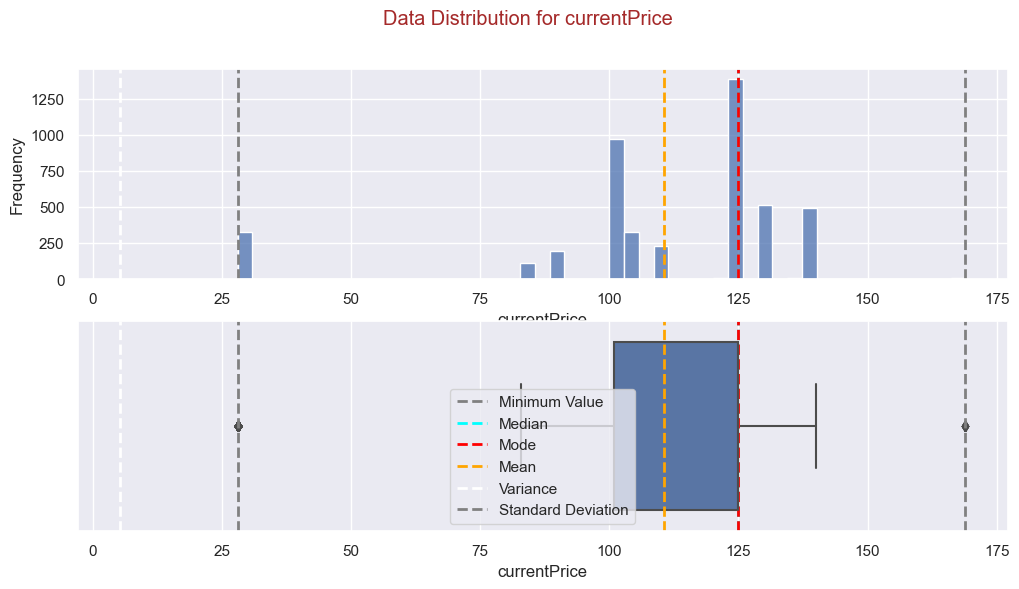

The statistical values are as follows:
 Minimum value:10146278.00
 Maximum value: 1012365345.00
 Mode: 12789093.00 
 Mean: 641946259.66 
 Standard Deviation: 480949176.13 
 Variance: 21930.55 
 Median: 1010048667.00


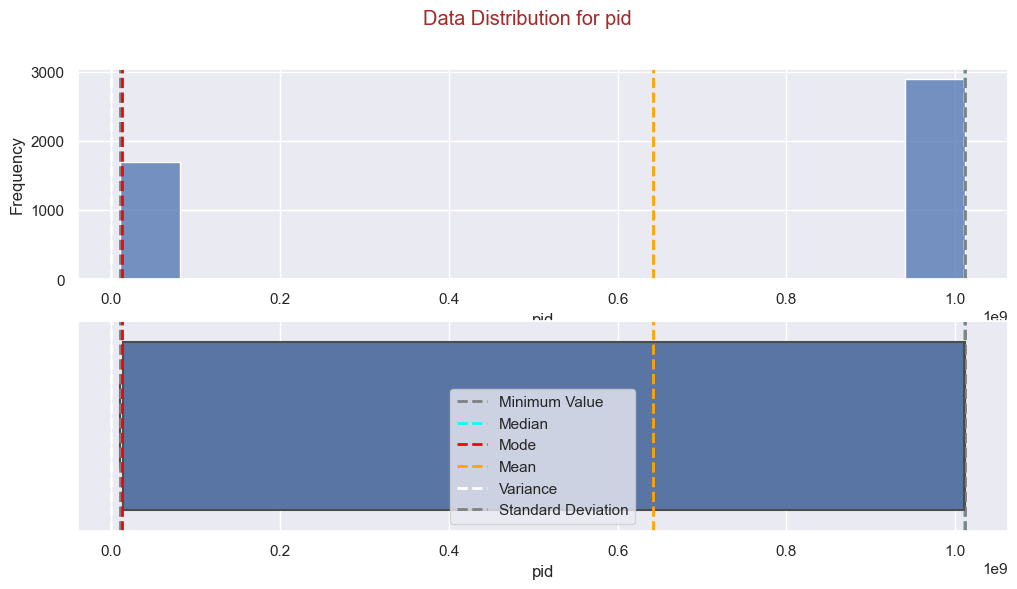

In [11]:
num_col = df.select_dtypes(["int", "float"]).columns.to_list()
for col in num_col:
    if col != "ID":
        show_distribution(df[col], col)

In [12]:
df.head()

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,subtitle,colorDescription,fullPrice,discounted,employeePrice,currentPrice,isLaunch,pid,label,ID
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK,1
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Palomino/White/Wild Berry,110,True,49.78,82.97,False,1003842468,IN_STOCK,2
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Sky J Purple/White/Sky J Light Purple,110,False,66.00,110.00,False,1012365345,IN_STOCK,3
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,Men's Shoes,Black/University Blue/White/Black,110,False,66.00,110.00,False,1012365344,IN_STOCK,4
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,Women's Shoes,Lucky Green/White/Aquatone,110,True,53.38,88.97,False,1010048667,IN_STOCK,5


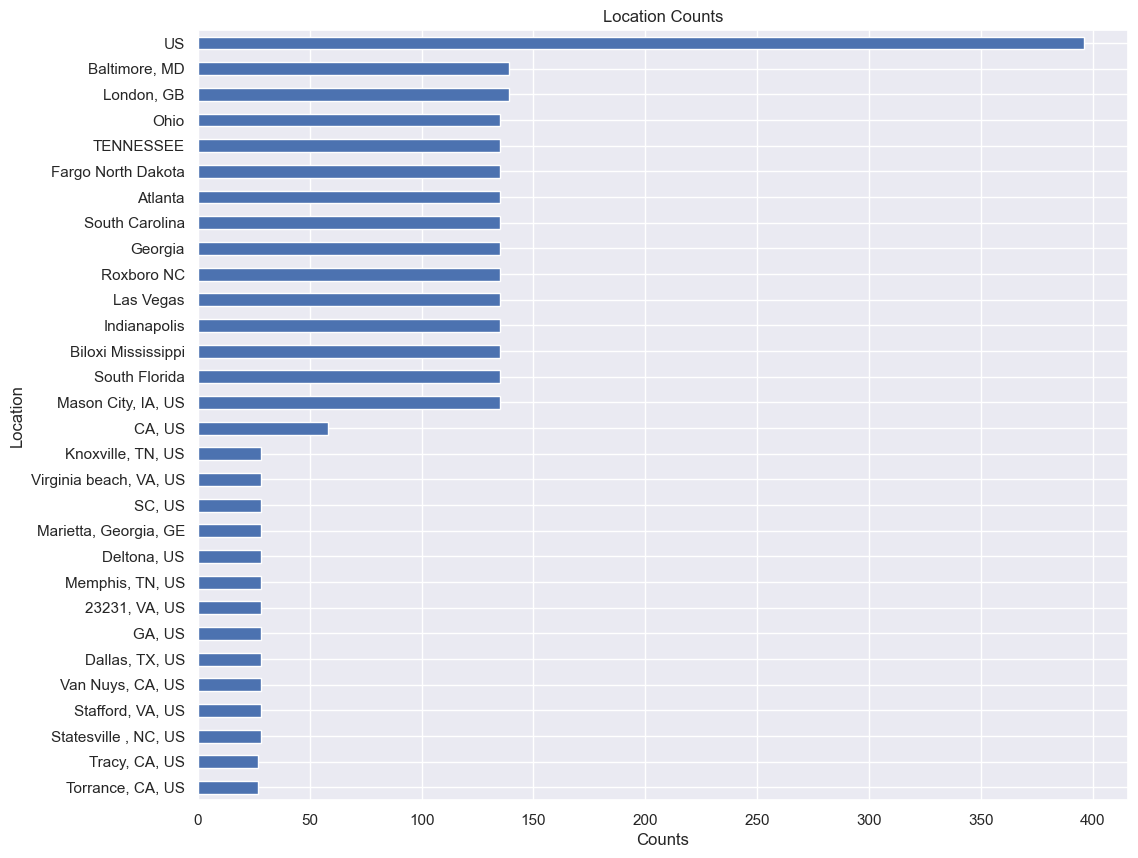

In [13]:
plt.figure(figsize=(12,10))
df.Location.value_counts(normalize=False).sort_values(ascending=True).tail(30).plot(kind="barh")
plt.title("Location Counts")
plt.xlabel("Counts")
plt.ylabel("Location")
plt.show()

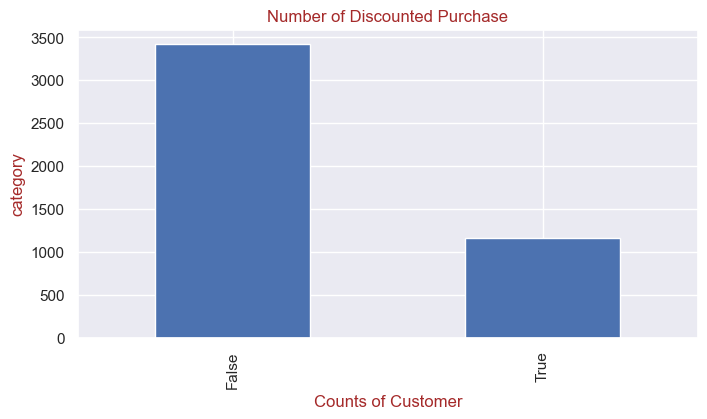

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
df.discounted.value_counts().plot(kind="bar")
plt.title("Number of Discounted Purchase", color="brown")
plt.xlabel("Counts of Customer", color="brown")
plt.ylabel("category", color="brown")
plt.show()

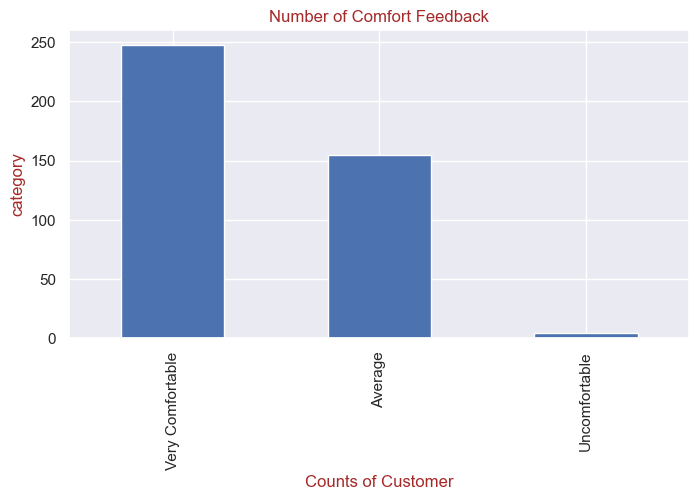

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
df["Comfort Feedback"].value_counts().plot(kind="bar")
plt.title("Number of Comfort Feedback", color="brown")
plt.xlabel("Counts of Customer", color="brown")
plt.ylabel("category", color="brown")
plt.show()

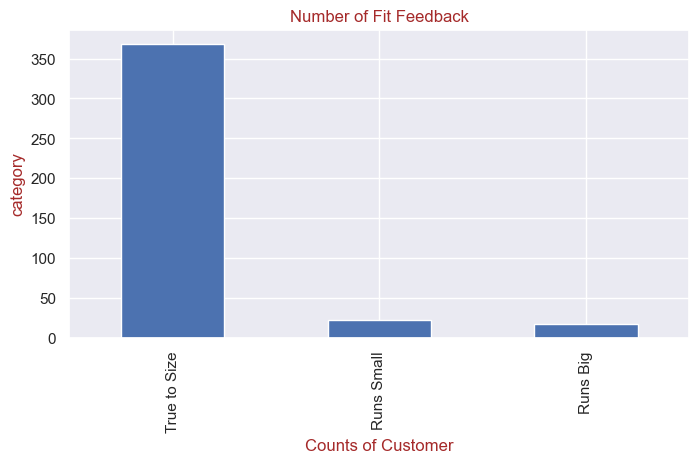

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
df["Fit Feedback"].value_counts().plot(kind="bar")
plt.title("Number of Fit Feedback", color="brown")
plt.xlabel("Counts of Customer", color="brown")
plt.ylabel("category", color="brown")
plt.show()

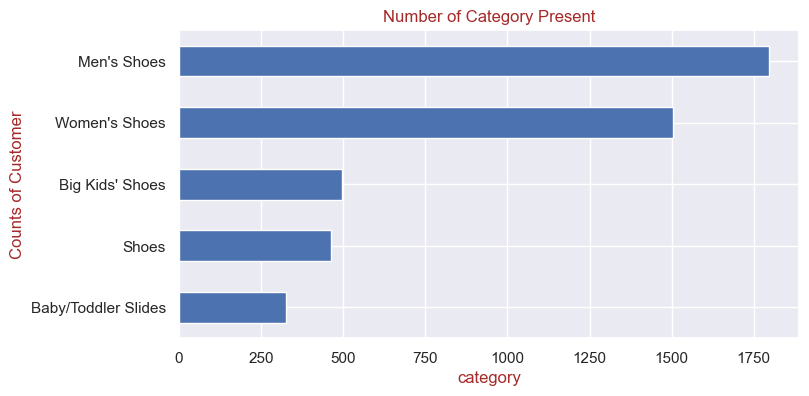

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
df["subtitle"].value_counts().sort_values(ascending=True).plot(kind="barh")
plt.title("Number of Category Present", color="brown")
plt.ylabel("Counts of Customer", color="brown")
plt.xlabel("category", color="brown")
plt.show()

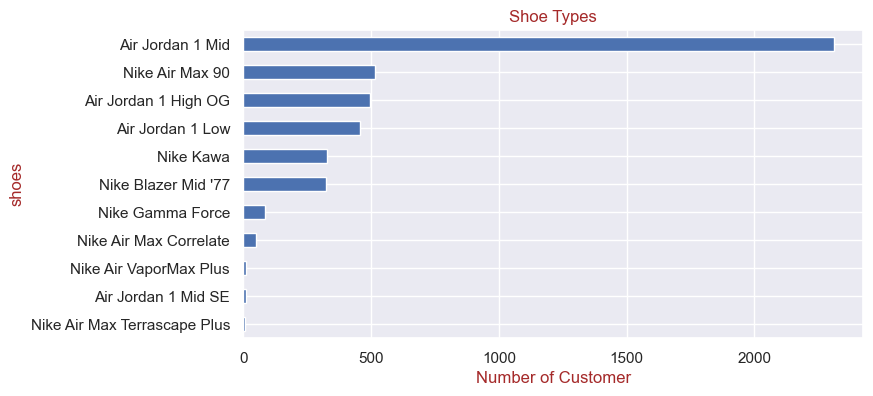

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
df.title.value_counts().sort_values(ascending=True).plot(kind="barh")
plt.title("Shoe Types", color="brown")
plt.xlabel("Number of Customer", color="brown")
plt.ylabel("shoes", color="brown")
plt.show()

****
# VADER Sentiment 
***

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores(df.iloc[1001]['Review'])

{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9676}

In [21]:
df["Review"]

0       Jordan Low 1 The delivery was on time as sched...
1       Jordan Low 1 The delivery was on time as sched...
2       Jordan Low 1 The delivery was on time as sched...
3       Jordan Low 1 The delivery was on time as sched...
4       Runs BIG Beautiful shoes, but runs BIG. I’m us...
                              ...                        
4582    Best air force 1s I bought these for my cousin...
4583    Timeles classic A timeless classic. Nothing li...
4584                                                 None
4585                                                 None
4586                                                 None
Name: Review, Length: 4587, dtype: object

In [22]:
def get_vader_scores(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    
    return sentiment['pos'], sentiment['neg'], sentiment['neu'], sentiment['compound']

# Apply VADER sentiment analysis to the 'Review' column
df[['Vader_Pos', 'Vader_Neg', 'Vader_Neu', 'Vader_Polarity']] = df['Review'].apply(lambda x: pd.Series(get_vader_scores(x)))

In [23]:
df.head()

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,...,employeePrice,currentPrice,isLaunch,pid,label,ID,Vader_Pos,Vader_Neg,Vader_Neu,Vader_Polarity
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,53.38,88.97,False,1010048667,IN_STOCK,1,0.297,0.045,0.659,0.9164
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,49.78,82.97,False,1003842468,IN_STOCK,2,0.297,0.045,0.659,0.9164
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,66.00,110.00,False,1012365345,IN_STOCK,3,0.297,0.045,0.659,0.9164
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,66.00,110.00,False,1012365344,IN_STOCK,4,0.297,0.045,0.659,0.9164
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,...,53.38,88.97,False,1010048667,IN_STOCK,5,0.208,0.000,0.792,0.7424


***
># Visualising VADER Results
***

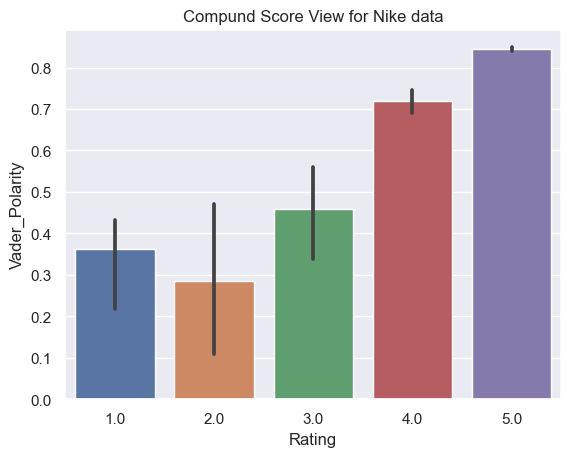

In [24]:
ax = sns.barplot(data=df, x='Rating', y='Vader_Polarity')
ax.set_title('Compund Score View for Nike data')
plt.show()

In [25]:
def show_compound_view(data, rating_column):
    #plot visualisation
    ax = sns.barplot(data=data, x='Rating', y=rating_column)
    ax.set_title(f'Varying  Average Rating By {rating_column}')
    plt.show()

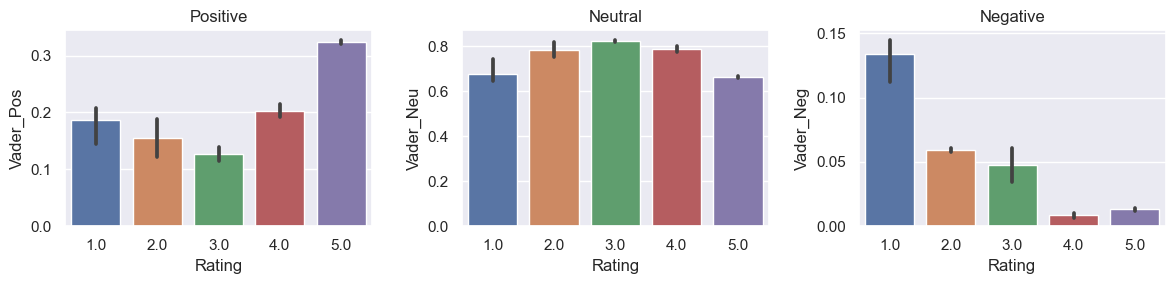

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Rating', y='Vader_Pos', ax=axs[0])
sns.barplot(data=df, x='Rating', y='Vader_Neu', ax=axs[1])
sns.barplot(data=df, x='Rating', y='Vader_Neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [27]:
def show_all_scores(data, pos, neu, neg):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    sns.barplot(data=data, x='Rating', y=pos, ax=axs[0])
    sns.barplot(data=data, x='Rating', y=neu, ax=axs[1])
    sns.barplot(data=data, x='Rating', y=neg, ax=axs[2])
    axs[0].set_title('Positive')
    axs[1].set_title('Neutral')
    axs[2].set_title('Negative')
    plt.tight_layout()
    plt.show()

***
# TextBlob
***

In [28]:
def get_textblob_scores(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return polarity, 0, 0, 'positive', polarity
    elif polarity < 0:
        return 0, abs(polarity), 0, 'negative', polarity
    else:
        return 0, 0, 0, 'neutral', polarity

# Apply TextBlob sentiment analysis to the 'Review' column
df[['TextBlob_Pos', 'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Polarity_Type', 'TextBlob_Polarity']] = df['Review'].apply(lambda x: pd.Series(get_textblob_scores(x)))


In [29]:
df.head()

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,...,ID,Vader_Pos,Vader_Neg,Vader_Neu,Vader_Polarity,TextBlob_Pos,TextBlob_Neg,TextBlob_Neu,TextBlob_Polarity_Type,TextBlob_Polarity
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,1,0.297,0.045,0.659,0.9164,0.405357,0.0,0,positive,0.405357
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,2,0.297,0.045,0.659,0.9164,0.405357,0.0,0,positive,0.405357
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,3,0.297,0.045,0.659,0.9164,0.405357,0.0,0,positive,0.405357
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,4,0.297,0.045,0.659,0.9164,0.405357,0.0,0,positive,0.405357
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,...,5,0.208,0.000,0.792,0.7424,0.030864,0.0,0,positive,0.030864


***
># Visualising TextBlob Results
***

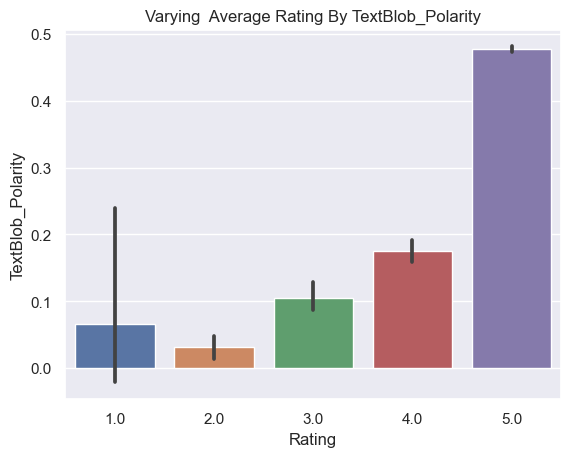

In [30]:
show_compound_view(df, "TextBlob_Polarity")

***
# SentiWordNet
***

In [31]:
# Define a mapping from NLTK POS tags to SentiWordNet POS tags
def get_sentiment(word, pos):
    if pos.startswith('J'):
        pos = 'a'
    elif pos.startswith('V'):
        pos = 'v'
    elif pos.startswith('N'):
        pos = 'n'
    elif pos.startswith('R'):
        pos = 'r'
    else:
        pos = None

    if pos:
        return list(swn.senti_synsets(word, pos))
    else:
        return []

def get_sentiwordnet_scores(text):
    pos_score = 0.0
    neg_score = 0.0
    neu_score = 0.0
    tokens_count = 0
    
    # Tokenize and tag parts of speech
    for word, pos in nltk.pos_tag(word_tokenize(text)):
        synsets = get_sentiment(word, pos)
        if synsets:
            synset = synsets[0]
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
            neu_score += synset.obj_score()
            tokens_count += 1
    
    if tokens_count == 0:
        return 0.0, 0.0, 0.0
    
    pos_score /= tokens_count
    neg_score /= tokens_count
    neu_score /= tokens_count
    
    return pos_score, neg_score, neu_score

# Apply SentiWordNet sentiment analysis to the 'Review' column
df[['SentiWordNet_Pos', 'SentiWordNet_Neg', 'SentiWordNet_Neu']] = df['Review'].apply(lambda x: pd.Series(get_sentiwordnet_scores(x)))

# Calculate the final sentiment polarity (positive - negative)
df['SentiWordNet_Polarity'] = df['SentiWordNet_Pos'] - df['SentiWordNet_Neg']


***
># Visualising SentiWordNet Results
***

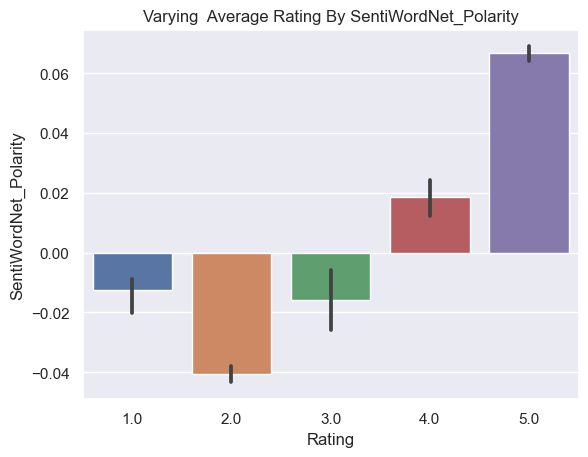

In [32]:
show_compound_view(df, 'SentiWordNet_Polarity')

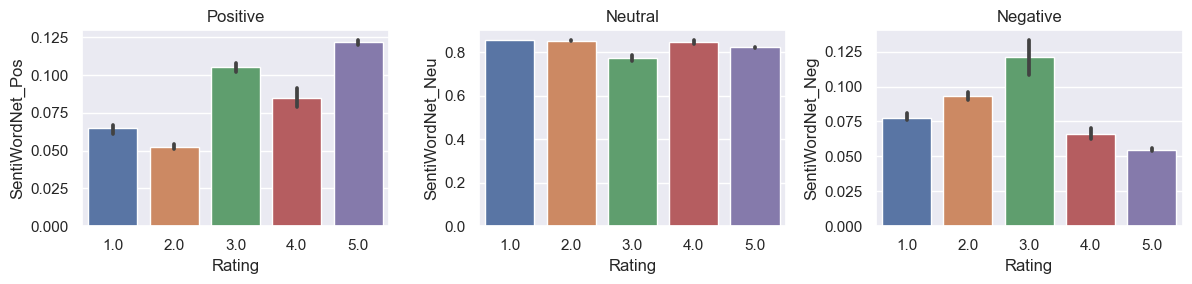

In [33]:
show_all_scores(df, 'SentiWordNet_Pos', 'SentiWordNet_Neu', 'SentiWordNet_Neg')

In [34]:
df.columns

Index(['Rating', 'Review Date', 'Location', 'Username', 'Review',
       'Fit Feedback', 'Comfort Feedback', 'Recommend Feedback', 'title',
       'IsPromoReview', 'subtitle', 'colorDescription', 'fullPrice',
       'discounted', 'employeePrice', 'currentPrice', 'isLaunch', 'pid',
       'label', 'ID', 'Vader_Pos', 'Vader_Neg', 'Vader_Neu', 'Vader_Polarity',
       'TextBlob_Pos', 'TextBlob_Neg', 'TextBlob_Neu',
       'TextBlob_Polarity_Type', 'TextBlob_Polarity', 'SentiWordNet_Pos',
       'SentiWordNet_Neg', 'SentiWordNet_Neu', 'SentiWordNet_Polarity'],
      dtype='object')

***
# Combine and compare Results
***

In [35]:
df.head()

,Rating,Review Date,Location,Username,Review,Fit Feedback,Comfort Feedback,Recommend Feedback,title,IsPromoReview,...,Vader_Polarity,TextBlob_Pos,TextBlob_Neg,TextBlob_Neu,TextBlob_Polarity_Type,TextBlob_Polarity,SentiWordNet_Pos,SentiWordNet_Neg,SentiWordNet_Neu,SentiWordNet_Polarity
0,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,0.9164,0.405357,0.0,0,positive,0.405357,0.135870,0.119565,0.744565,0.016304
1,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,0.9164,0.405357,0.0,0,positive,0.405357,0.135870,0.119565,0.744565,0.016304
2,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,0.9164,0.405357,0.0,0,positive,0.405357,0.135870,0.119565,0.744565,0.016304
3,5.0,"Sep 8, 2023",US,Manny214Fresh,Jordan Low 1 The delivery was on time as sched...,True to Size,Very Comfortable,Yes,Air Jordan 1 Low,False,...,0.9164,0.405357,0.0,0,positive,0.405357,0.135870,0.119565,0.744565,0.016304
4,4.0,"Sep 7, 2023",US,ChardyC719344446,"Runs BIG Beautiful shoes, but runs BIG. I’m us...",Runs Big,Average,Yes,Air Jordan 1 Low,False,...,0.7424,0.030864,0.0,0,positive,0.030864,0.066667,0.066667,0.866667,0.000000


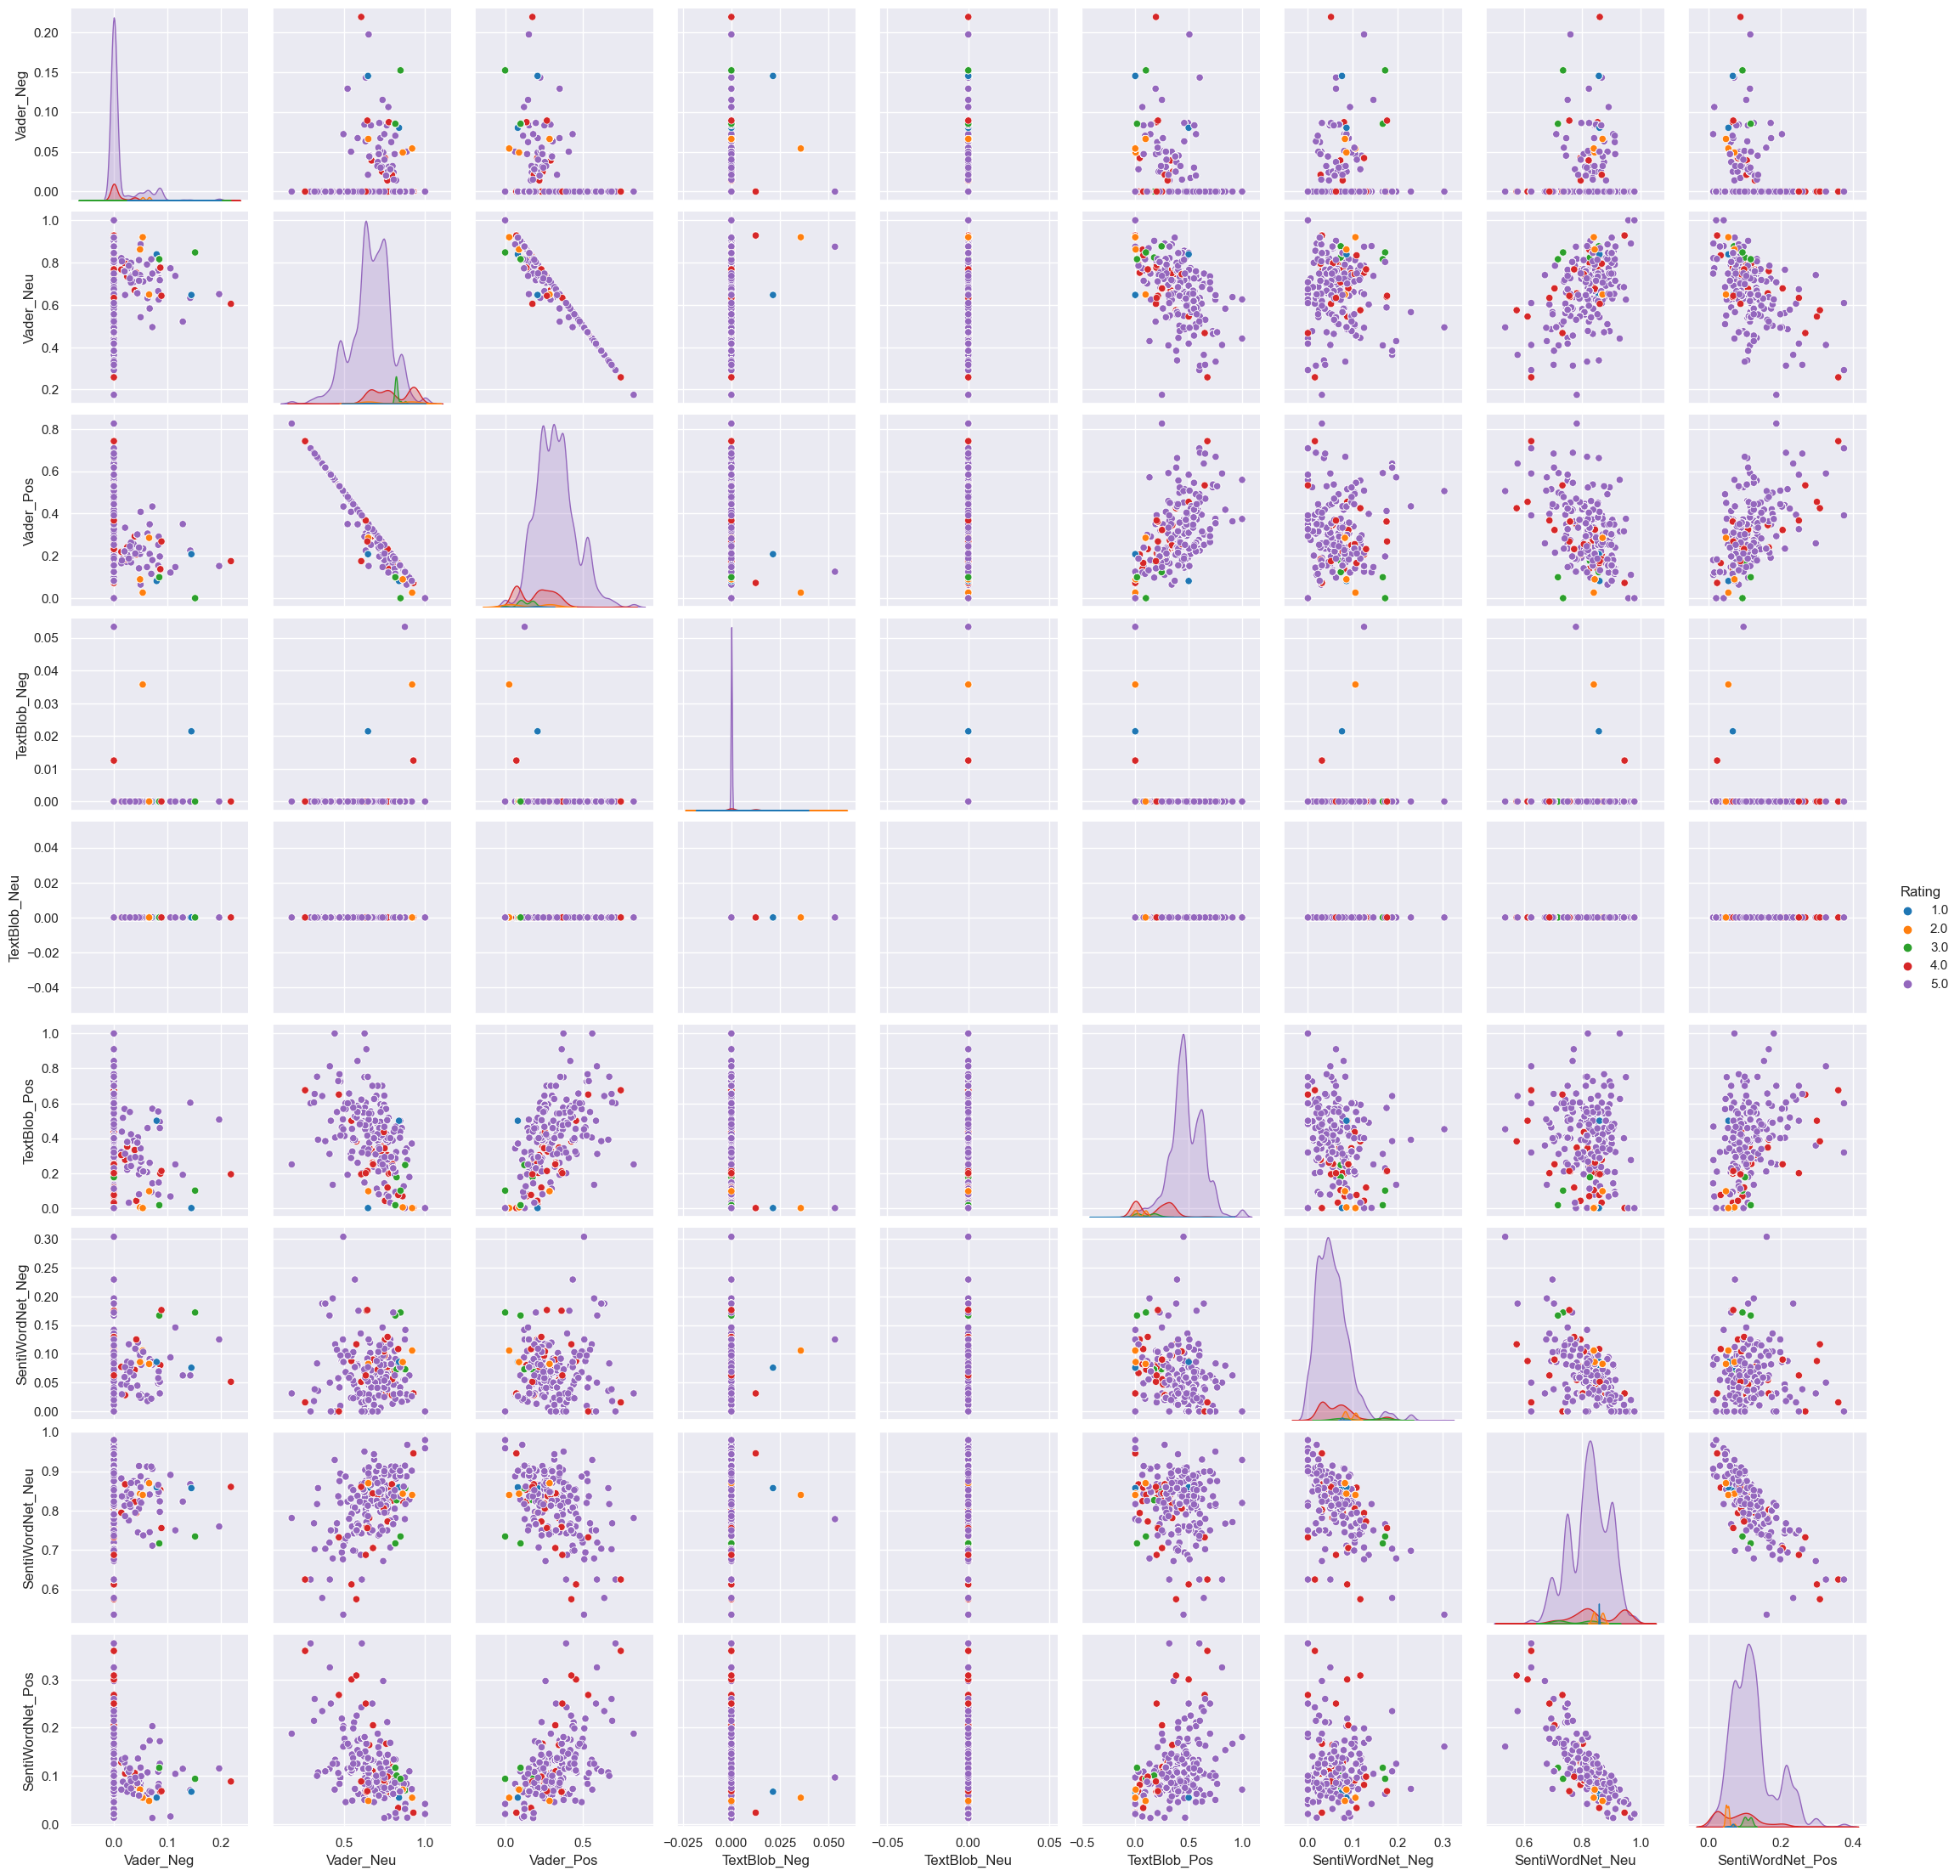

In [36]:
sns.pairplot(data=df,
             vars=['Vader_Neg', 'Vader_Neu', 'Vader_Pos',
                   'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Pos',
                   'SentiWordNet_Neg', 'SentiWordNet_Neu', 'SentiWordNet_Pos'],
            hue='Rating', 
            palette='tab10')
plt.show()

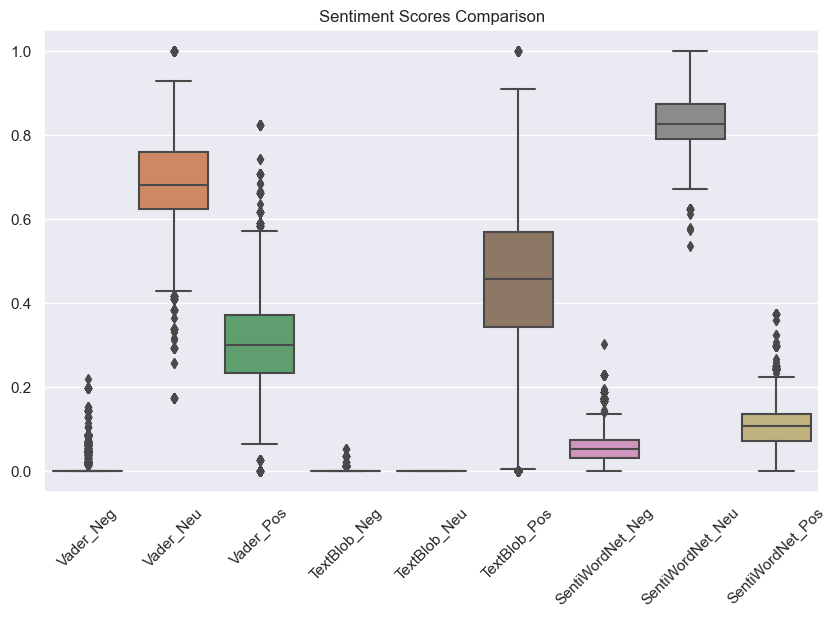

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Vader_Neg', 'Vader_Neu', 'Vader_Pos',
                   'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Pos',
                   'SentiWordNet_Neg', 'SentiWordNet_Neu', 'SentiWordNet_Pos']])
plt.title('Sentiment Scores Comparison')
plt.xticks(rotation=45)
plt.show()

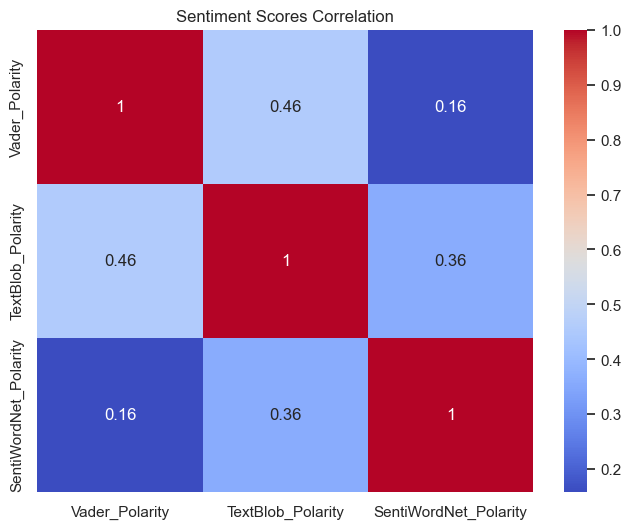

In [38]:
correlation = df[['Vader_Polarity', 'TextBlob_Polarity', 'SentiWordNet_Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Sentiment Scores Correlation')
plt.show()

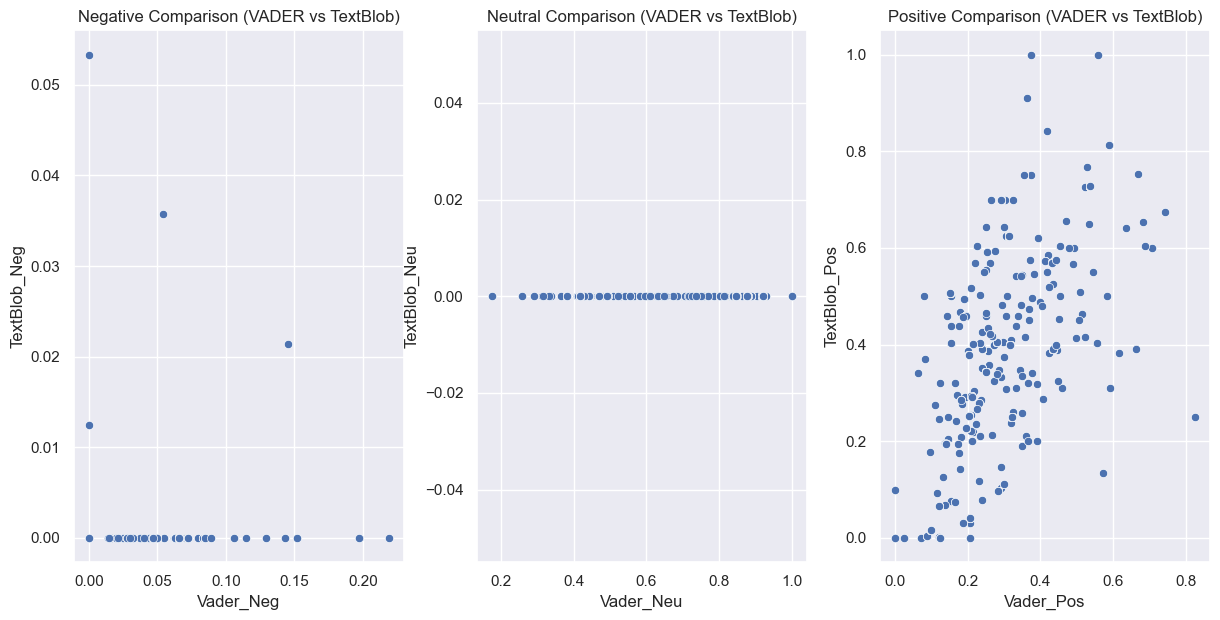

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.scatterplot(x='Vader_Neg', y='TextBlob_Neg', data=df)
plt.title('Negative Comparison (VADER vs TextBlob)')
plt.subplot(132)
sns.scatterplot(x='Vader_Neu', y='TextBlob_Neu', data=df)
plt.title('Neutral Comparison (VADER vs TextBlob)')
plt.subplot(133)
sns.scatterplot(x='Vader_Pos', y='TextBlob_Pos', data=df)
plt.title('Positive Comparison (VADER vs TextBlob)')
plt.tight_layout(pad=0)
plt.show()

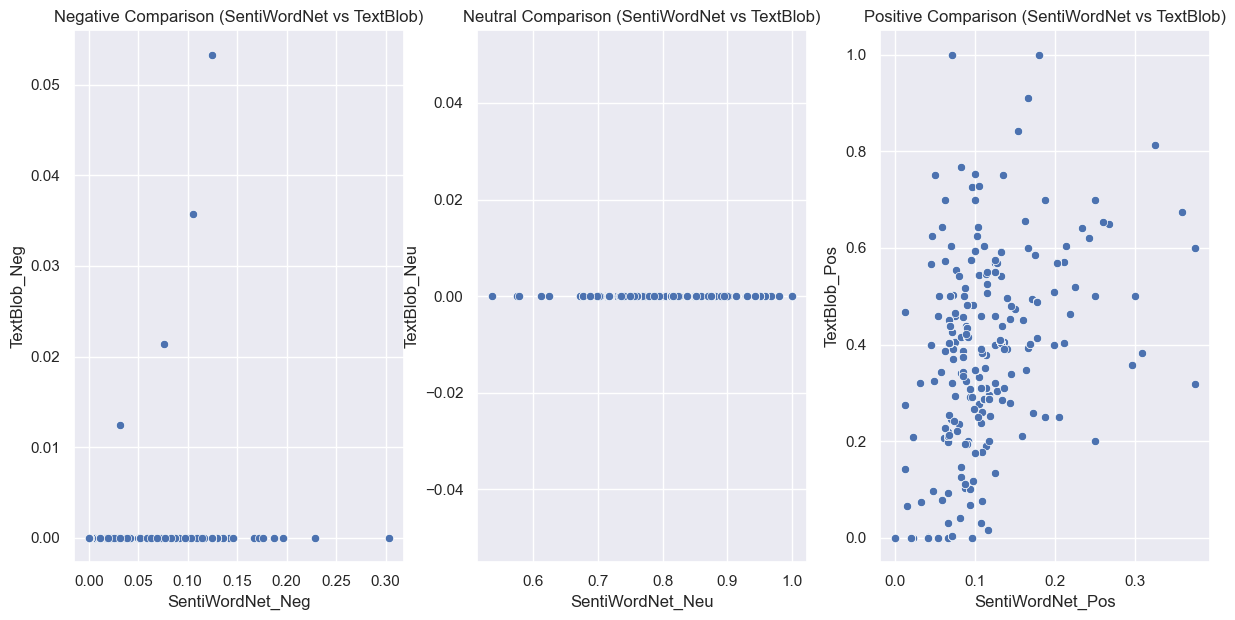

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.scatterplot(x='SentiWordNet_Neg', y='TextBlob_Neg', data=df)
plt.title('Negative Comparison (SentiWordNet vs TextBlob)')
plt.subplot(132)
sns.scatterplot(x='SentiWordNet_Neu', y='TextBlob_Neu', data=df)
plt.title('Neutral Comparison (SentiWordNet vs TextBlob)')
plt.subplot(133)
sns.scatterplot(x='SentiWordNet_Pos', y='TextBlob_Pos', data=df)
plt.title('Positive Comparison (SentiWordNet vs TextBlob)')
plt.tight_layout(pad=0)
plt.show()

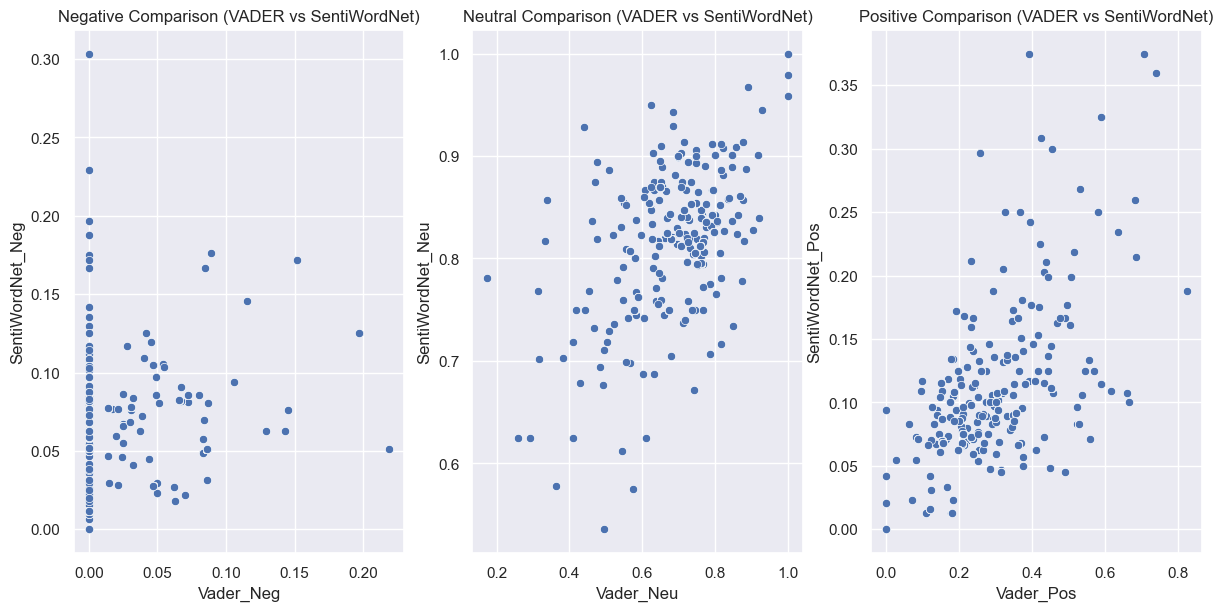

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.scatterplot(x='Vader_Neg', y='SentiWordNet_Neg', data=df)
plt.title('Negative Comparison (VADER vs SentiWordNet)')
plt.subplot(132)
sns.scatterplot(x='Vader_Neu', y='SentiWordNet_Neu', data=df)
plt.title('Neutral Comparison (VADER vs SentiWordNet)')
plt.subplot(133)
sns.scatterplot(x='Vader_Pos', y='SentiWordNet_Pos', data=df)
plt.title('Positive Comparison (VADER vs SentiWordNet)')
plt.tight_layout(pad=0.25)
plt.show()

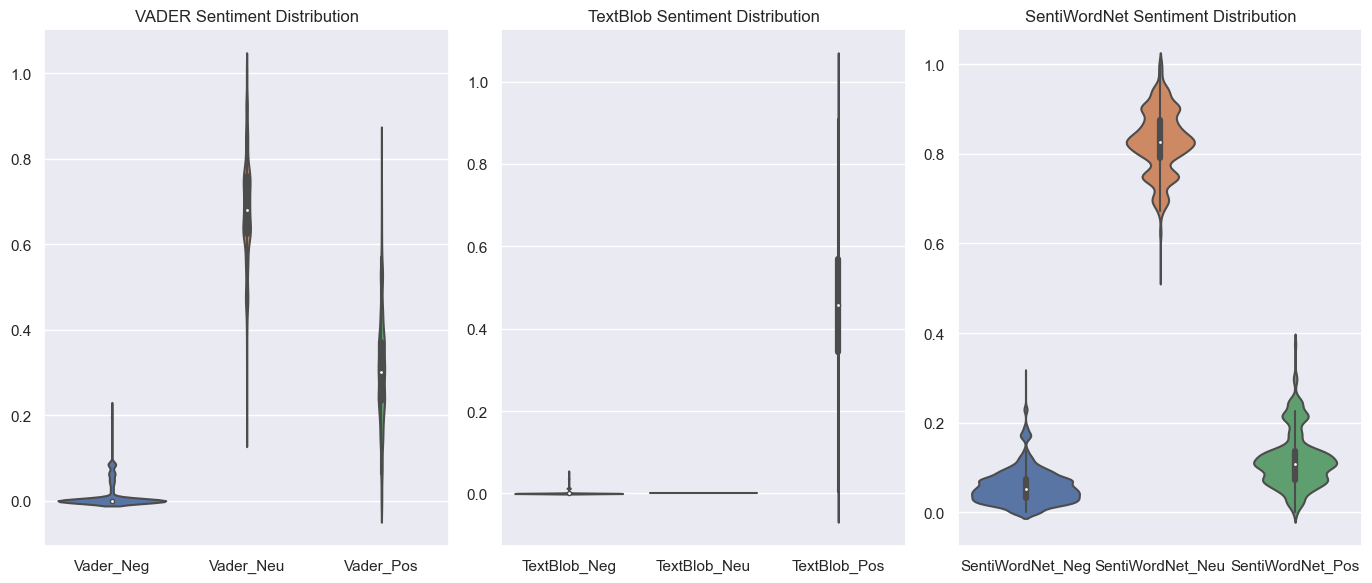

In [42]:
plt.figure(figsize=(14, 6))
plt.subplot(131)
sns.violinplot(data=df[['Vader_Neg', 'Vader_Neu', 'Vader_Pos']])
plt.title('VADER Sentiment Distribution')
plt.subplot(132)
sns.violinplot(data=df[['TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Pos']])
plt.title('TextBlob Sentiment Distribution')
plt.subplot(133)
sns.violinplot(data=df[['SentiWordNet_Neg', 'SentiWordNet_Neu', 'SentiWordNet_Pos']])
plt.title('SentiWordNet Sentiment Distribution')
plt.tight_layout()
plt.show()

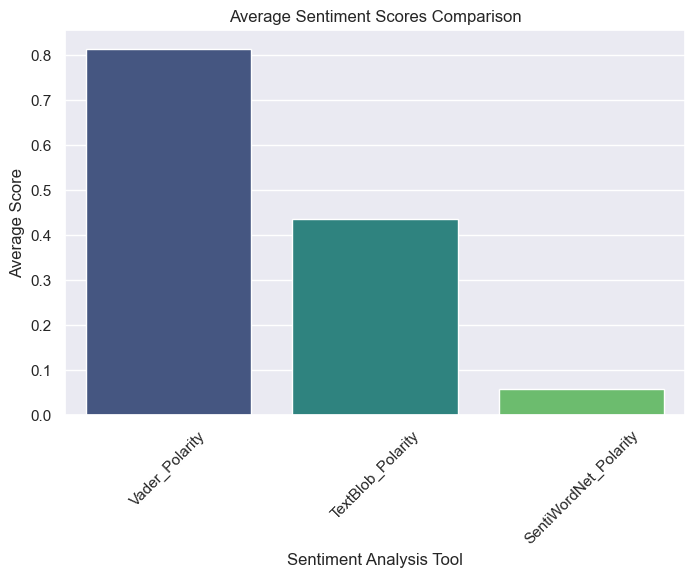

In [43]:
average_scores = df[['Vader_Polarity', 'TextBlob_Polarity', 'SentiWordNet_Polarity']].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis')
plt.title('Average Sentiment Scores Comparison')
plt.xlabel('Sentiment Analysis Tool')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

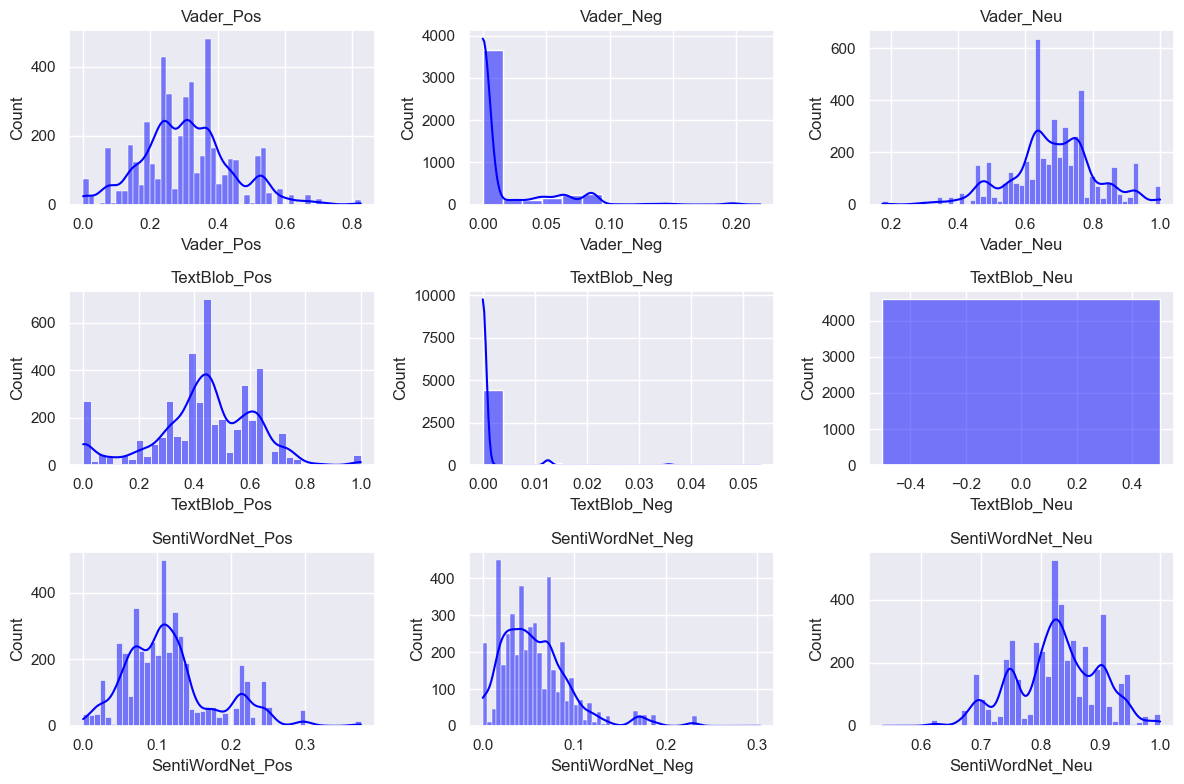

In [44]:
sentiment_columns = ['Vader_Pos', 'Vader_Neg', 'Vader_Neu',
                     'TextBlob_Pos', 'TextBlob_Neg', 'TextBlob_Neu',
                     'SentiWordNet_Pos', 'SentiWordNet_Neg', 'SentiWordNet_Neu']

plt.figure(figsize=(12, 8))
for i, col in enumerate(sentiment_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

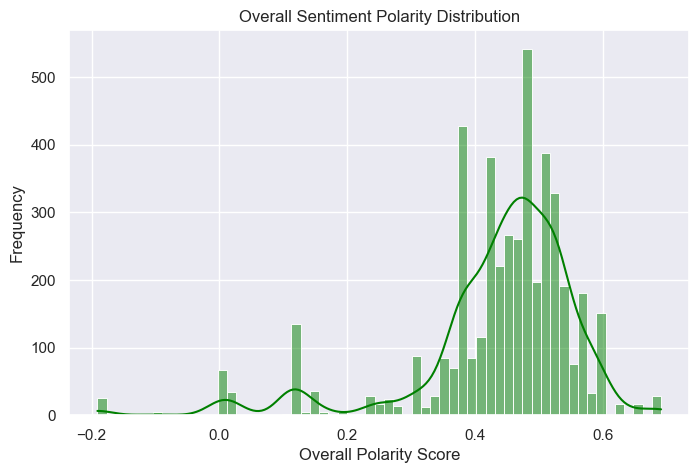

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df[['Vader_Polarity', 'TextBlob_Polarity', 'SentiWordNet_Polarity']].mean(axis=1), kde=True, color='green')
plt.title('Overall Sentiment Polarity Distribution')
plt.xlabel('Overall Polarity Score')
plt.ylabel('Frequency')
plt.show()

***
# Conclusion
***